In [2]:
import pandas as pd
import numpy as np
import spacy
nlp = spacy.load('en_core_web_sm')
from scipy.sparse import coo_matrix, csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('mishnah.csv')
df.drop(columns='Unnamed: 0',inplace=True)

# Topic Modeling the Mishnah
### ***What is the Mishnah?***  
Good question. The mishnah is not easily defined, and to do it justice it is a good idea to put it in its historical context.  
Before the first century CE, the jewish faith was extremely different. It was still, in practice, the simple bronze-age city-cult of Jerusalem. A sacrificial state religion centered on a single temple in what is now Israel/Palestine. Its practice was primarily based on adherence to certain already-established dietary, moral, and practical restrictions, as well as tithing to the ruling dynasty and a small tribe of priests who administered the temple.  
This all changed in 70 CE, when after decades of rebellion and a multi-year siege, soldiers of the Roman Empire entered the city of Jerusalem and sacked it. In the process they destroyed the temple and initiated the modern Jewish diaspora.  
In the absence of temple, the priestly elite, and the the ruling authority, the religion needed to be reformed. An already active movement turning the religion towards legalism, in a very similar path that Christianity and Islam would follow in the next millenium, came to the forefront of Jewish thought. This movement re-focussed the religion from a sacrificial system to a devotional once. Rather than the burnt animal sacrifices of Jerusalem, Judaism came to be marked by the legal interpretation of the original 'Old Testament', endogamy (marriage only within the cultural group), prayer, and practice. This process had been started some hundreds of years earlier. Already, there was developping an oral tradition of laws, philosophy, and theology that came to descrive the religion. This oral collection eventually became what is now known as the Mishnah. In summary, it became a kind of civil and religious common law.  
Some time around 200 CE, a rabbi named Yehuda HaNasi (literally "The Prince") in Roman Judea compiled and editted this oral tradition. In doing so, it was organized into collections known as Sedarim ("orders"), Masekhot ('tractates'), Chapters, and individual mishnahs, usually of the length of what we might call paragraphs. **These will be my documents.**

## The "Orders" of the Mishnah are as follows:  
### Zeraim ("Seeds")  
Covers prayers, blessings, agricultural laws and tithes. (11 tractates)  
- **Berakhot** ("Blessings"), consists of nine chapters and deals with the rules for daily prayer, particularly the Shema and the Amidah, and other blessings and prayers said before and after eating, and on other occasions.  
- **Pe'ah** ("Corner"), has eight chapters and deals with the commandments concerning the gifts to the poor from the produce of the land, namely from the corners of the field which must be left to the poor, gleanings, and forgotten produce assigned to them, as specified in the Torah Lev 19:9-10, Lev 23:22 and (Deut 24:19-22), and with the topic of charity and rights of the poor in general.  
- **Demai** ("Doubtfully Tithed Produce"), has seven chapters and deals with cases in which it is uncertain that tithes have been set aside from produce for the Kohanim (priests) and Levites.  
- **Kil'ayim** ("Mixed Species"), has nine chapters and deals with rules regarding forbidden mixtures in agriculture, clothing and animal breeding, as specified in Leviticus 19:19 and Deuteronomy 22:9-11.  
- **Shevi'it** ("Seventh Year") has ten chapters which deal with the agricultural and fiscal regulations concerning the Sabbatical Year, and the remission of debts, as specified in Exodus 23:11, Leviticus 25:1-8 and Deuteronomy 15:1-11.    
- **Terumot** ("Donations") comprises eleven chapters dealing with the laws regarding the terumah donation given to the Kohanim, as specified in Numbers 18:8-20, Deuteronomy 18:4.  
- **Ma'aserot** or **Ma'aser Rishon** ("Tithes" or "First Tithes") has five chapters concerning the rules regarding the tithe to be given to the Levites as specified in Numbers 18:21-24.  
- **Ma'aser Sheni** ("Second Tithe"), comprising five chapters, deals with the rules concerning the tithe or its equivalent which was to be eaten in Jerusalem in the first, second, fourth and sixth years of the seven-year agricultural cycle culminating in the Sabbatical Year and as mandated by the Torah, as stated in Deuteronomy 14:22-26.  
- **Hallah** ("Dough") comprises four chapters that deal with the laws regarding the offering of dough to be given to the Kohanim as specified in Numbers 15:18-21.  
- **Orlah** ("First Fruits of Trees") with three chapters deals chiefly with the prohibitions on the use of a tree for the first three years after it has been planted, as specified in Leviticus 19:23-25 and the requirements regarding the fruit of the fourth year.  
- **Bikkurim** ("First Fruits") has three chapters with the laws concerning the first-fruit gifts to the Kohanim and the Temple and a description of the donation ceremony, as specified in Exodus 23:19 and Deuteronomy 26:1.  

### Moed ("Festival")  
Pertaining to the laws of the Sabbath and the Festivals. (12 tractates)  
- **Shabbat** ("Sabbath") deals with the 39 prohibitions of "work" on the Shabbat.  
- **Eruvin** ("Mixtures") deals with the Eruv or Sabbath-bound - a category of constructions/delineations that alter the domains of the Sabbath for carrying and travel.  
- **Pesahim** ("Passover Festivals") deals with the prescriptions regarding the Passover and the paschal sacrifice.  
- **Shekalim** ("Shekels") deals with the collection of the half-Shekel as well as the expenses and expenditure of the Temple.  
- **Yoma** ("The Day") called also "Kippurim" or "Yom ha-Kippurim" ("Day of Atonement"); deals with the prescriptions Yom Kippur, especially the ceremony by the Kohen Gadol.  
- **Sukkah** ("Booth") deals with the festival of Sukkot (the Feast of Tabernacles) and the Sukkah itself. Also deals with the Four Species (Lulav, Etrog, Hadass, Aravah — Palm branch, Citron, Myrtle, Willow) which are waved on Sukkot.  
- **Beitza** ("Egg") (So called from the first word, but originally termed, according to its subject, Yom Tov - "Holidays") deals chiefly with the rules to be observed on Yom Tov.  
- **Rosh Hashanah** ("New Year") deals chiefly with the regulation of the calendar by the new moon, and with the services of the festival of Rosh Hashanah.  
- **Ta'anit** ("Fasting") deals chiefly with the special fast-days in times of drought or other untoward occurrences.  
- **Megillah** ("Scroll") contains chiefly regulations and prescriptions regarding the reading of the scroll of Esther at Purim, and the reading of other passages from the Torah and Neviim in the synagogue.  
- **Mo'ed Katan** ("Little Festival") deals with Chol HaMoed, the intermediate festival days of Pesach and Sukkot.  
- **Hagigah** ("Festival Offering") deals with the Three Pilgrimage Festivals (Passover, Shavuot, Sukkot) and the pilgrimage offering that men were supposed to bring in Jerusalem.  
### Nashim ("Women")   
Concerning marriage and divorce, i.e. family law, some forms of oaths and the laws of the nazirite (sort of a monk).  
### Nezikin ("Damages")  
Dealing with civil and criminal law, the functioning of the courts and oaths.  
### Kodashim ("Holy things") 
Regarding sacrificial rites, the Temple, and the dietary laws.  
### Tohorot ("Purities") 
Pertaining to the laws of purity and impurity, including the impurity of the dead, the laws of food purity and bodily purity.

##### For the purposes of this study I will use the english translation supplied by Sefaria.org. Some terms are left as hebrew to english transliteration, and I will attempt to retain these and use them to make sense as best I can.


In [4]:
from nltk.corpus import stopwords
default_stop = list(set(stopwords.words('english')))
my_stop = ['say','rabbi','forget','may','give','poor','sheaf','tithe','take','shall','produce','buy',
          'one','two',
          'bet','terumah','meir','hillel','shammai','elazar']
final_stop = default_stop + my_stop

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
cv = TfidfVectorizer(stop_words=final_stop,ngram_range=(1,2),max_df = 0.06)
X = cv.fit_transform(df[df.seder=='Zeraim'].tokens)
tfidf = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
print('got tfidf\n')
sparse_mtx = csr_matrix(tfidf.values)
print('got sparse matrix\n')
words = tfidf.columns
from sklearn.decomposition import NMF
model = NMF(n_components=11, init='random', random_state=0, max_iter = 2000)
doc_topics = model.fit_transform(sparse_mtx)
print('fit nmf\n')
t = model.components_.argsort(axis=1)[:,-1:-9:-1]
topic_words = [[words[e] for e in l] for l in t]
topic_words

got tfidf

got sparse matrix

fit nmf



[['maaser sheni',
  'sheni',
  'maaser',
  'redeem',
  'sheni money',
  'sela',
  'become unclean',
  'unclean'],
 ['hundred',
  'orlah',
  'burn',
  'must burn',
  'unclean',
  'medumma',
  'render',
  'seah fall'],
 ['bless', 'blessing', 'food', 'meal', 'god', 'shema', 'create', 'obligation'],
 ['fifth',
  'value',
  'repay',
  'repayment',
  'value fifth',
  'repay value',
  'must repay',
  'forgive'],
 ['copper',
  'coin',
  'sela',
  'silver',
  'copper coin',
  'exchange',
  'change',
  'shekel'],
 ['basket', 'trust', 'oil', 'kind', 'vegetable', 'wheat', 'friend', 'demai'],
 ['apply',
  'money substitute',
  'substitute',
  'apply money',
  'removal',
  'removal apply',
  'law removal',
  'substitute law'],
 ['cluster',
  'grape',
  'belong',
  'defective',
  'defective cluster',
  'olive',
  'owner',
  'peah'],
 ['cause',
  'fermentation',
  'cause fermentation',
  'enough',
  'leaven',
  'enough cause',
  'fall dough',
  'leaven kilayim'],
 ['row',
  'cubit',
  'handbreadth',
 

In [6]:
predicted_topics = []
topic_assignments = ['Maaser Sheni','Orlah','Berakhot','Sheviit','Terumot','Demai','Maasrot','Peah','Challah','Kilayim','Bikkurim']
for doc in doc_topics:
    predicted_topics.append(topic_assignments[np.argmax(doc)])

In [9]:
rights = (df[df.seder=='Zeraim'].tractate==predicted_topics).values

In [10]:
from sklearn.manifold import TSNE
arr = pd.DataFrame(doc_topics)
topic_num = np.argmax(doc_topics, axis=0)
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 627 samples in 0.001s...
[t-SNE] Computed neighbors for 627 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 627 / 627
[t-SNE] Mean sigma: 0.007179
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.246346
[t-SNE] KL divergence after 1000 iterations: 0.547319


Text(0, 0.5, '')

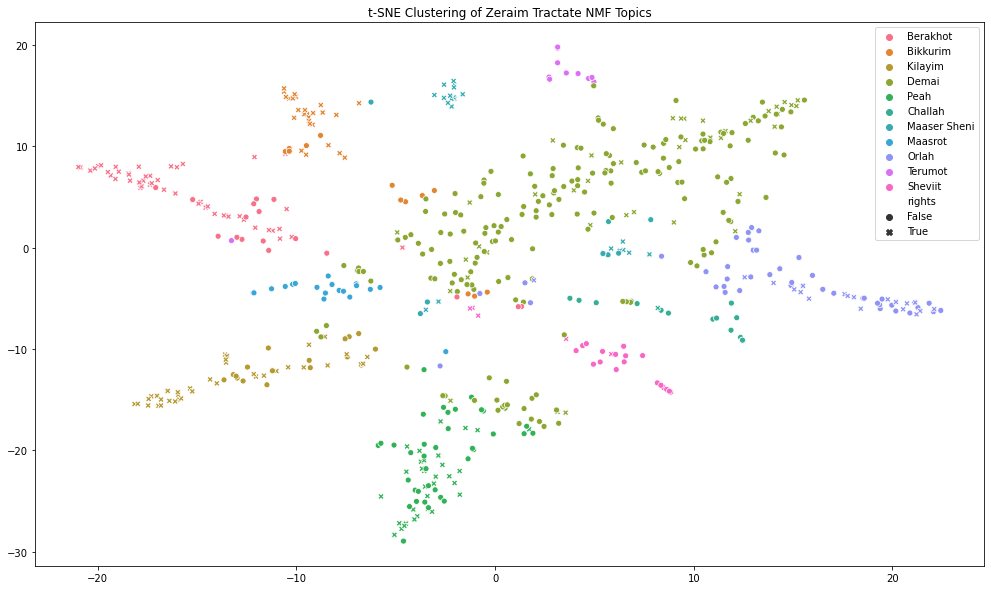

In [12]:
topic_num = np.argmax(doc_topics, axis=1)
tsne_df = pd.DataFrame(tsne_lda,predicted_topics)
tsne_df.rename(columns={0: "one", 1: "two"},inplace=True)
tsne_df['rights']=rights
plt.figure(figsize=(17,10))
sns.scatterplot('one','two',style = 'rights',hue=tsne_df.index,data=tsne_df)
plt.title('t-SNE Clustering of Zeraim Tractate NMF Topics')
plt.xlabel('')
plt.ylabel('')

Accuracy: 0.37799043062200954
Precision: 0.370481346816501
Recall: 0.37799043062200954


Text(0.5, 1.0, 'Zeraim Unsupervised Topics')

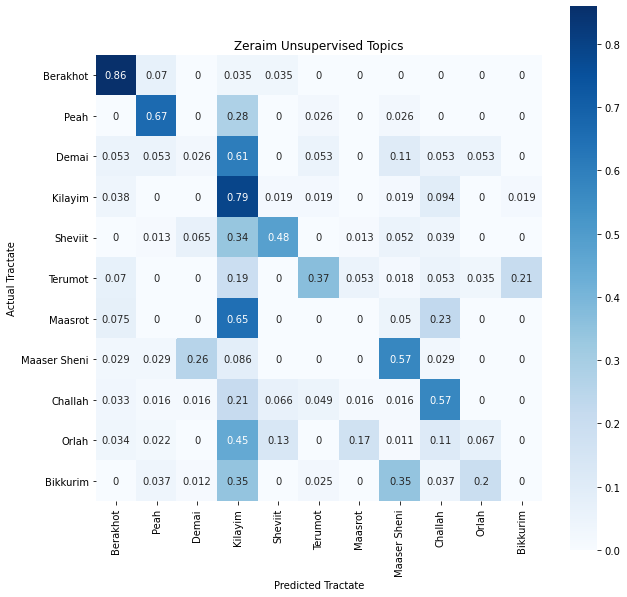

In [7]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
print('Accuracy: {}'.format(accuracy_score(df[df.seder=='Zeraim'].tractate,predicted_topics)))
print('Precision: {}'.format(precision_score(df[df.seder=='Zeraim'].tractate,predicted_topics,average='weighted')))
print('Recall: {}'.format(recall_score(df[df.seder=='Zeraim'].tractate,predicted_topics,average='weighted')))
c_mat = confusion_matrix(df[df.seder=='Zeraim'].tractate,predicted_topics,normalize='true')
plt.figure(figsize=(10,10))
sns.heatmap(c_mat, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=df[df.seder=='Zeraim'].tractate.unique(),
           yticklabels=df[df.seder=='Zeraim'].tractate.unique())
plt.xlabel('Predicted Tractate')
plt.ylabel('Actual Tractate')
plt.title('Zeraim Unsupervised Topics')

In [107]:
models = []
score_type = []
score = []
split_type = []
dimensions = []

for n in [1,2,4,11,25,50,100]:
    print(n)
    training_accuracy = []
    training_precision = []
    training_recall = []
    testing_accuracy = []
    testing_precision = []
    testing_recall = []

    
    from sklearn.model_selection import train_test_split
    X_train=[]
    X_test=[]
    y_train=[]
    y_test=[]
    from sklearn.model_selection import train_test_split
    for i,tractate in enumerate(list(df[df.seder=='Zeraim'].tractate.unique())):
        X = df[df.tractate==tractate].tokens
        y = df[df.tractate==tractate].tractate
        X_train.extend(train_test_split(X, y, test_size=0.2, random_state=42)[0])
        X_test.extend(train_test_split(X, y, test_size=0.2, random_state=42)[1])
        y_train.extend(train_test_split(X, y, test_size=0.2, random_state=42)[2])
        y_test.extend(train_test_split(X, y, test_size=0.2, random_state=42)[3])
    X_train = pd.Series(X_train)
    X_test = pd.Series(X_test)
    y_train = pd.Series(y_train)
    y_test = pd.Series(y_test)
    

    X_train = cv.fit_transform(X_train)
    tfidf_train = pd.DataFrame(X_train.toarray(), columns=cv.get_feature_names())
    words_train = tfidf_train.columns
    X_train = csr_matrix(tfidf_train.values)

    X_test = cv.transform(X_test)
    tfidf_test = pd.DataFrame(X_test.toarray(), columns=cv.get_feature_names())
    words_test = tfidf_test.columns
    X_test = csr_matrix(tfidf_test.values)

    model = NMF(n_components=n, init='random', random_state=0, max_iter = 2000)
    X_train = model.fit_transform(X_train)
    X_test = model.transform(X_test)


    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier().fit(X_train,y_train)
    knn_train_preds = knn.predict(X_train)
    knn_test_preds = knn.predict(X_test)
    score.append(accuracy_score(y_train,knn_train_preds))
    models.append('KNN')
    score_type.append('accuracy')
    split_type.append('train')
    dimensions.append(n)
    score.append(precision_score(y_train,knn_train_preds,average='weighted'))
    models.append('KNN')
    score_type.append('precision')
    split_type.append('train')
    dimensions.append(n)
    score.append(recall_score(y_train,knn_train_preds,average='weighted'))
    models.append('KNN')
    score_type.append('recall')
    split_type.append('train')
    dimensions.append(n)
    score.append(accuracy_score(y_test,knn_test_preds))
    models.append('KNN')
    score_type.append('accuracy')
    split_type.append('test')
    dimensions.append(n)
    score.append(precision_score(y_test,knn_test_preds,average='weighted'))
    models.append('KNN')
    score_type.append('precision')
    split_type.append('test')
    dimensions.append(n)
    score.append(recall_score(y_test,knn_test_preds,average='weighted'))
    models.append('KNN')
    score_type.append('recall')
    split_type.append('test')
    dimensions.append(n)


    


    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(max_depth=5).fit(X_train,y_train)
    dtc_train_preds = dtc.predict(X_train)
    dtc_test_preds = dtc.predict(X_test)
    score.append(accuracy_score(y_train,dtc_train_preds))
    models.append('Decision Tree')
    score_type.append('accuracy')
    split_type.append('train')
    dimensions.append(n)
    score.append(precision_score(y_train,dtc_train_preds,average='weighted'))
    models.append('Decision Tree')
    score_type.append('precision')
    split_type.append('train')
    dimensions.append(n)
    score.append(recall_score(y_train,dtc_train_preds,average='weighted'))
    models.append('Decision Tree')
    score_type.append('recall')
    split_type.append('train')
    dimensions.append(n)
    score.append(accuracy_score(y_test,dtc_test_preds))
    models.append('Decision Tree')
    score_type.append('accuracy')
    split_type.append('test')
    dimensions.append(n)
    score.append(precision_score(y_test,dtc_test_preds,average='weighted'))
    models.append('Decision Tree')
    score_type.append('precision')
    split_type.append('test')
    dimensions.append(n)
    score.append(recall_score(y_test,dtc_test_preds,average='weighted'))
    models.append('Decision Tree')
    score_type.append('recall')
    split_type.append('test')
    dimensions.append(n)

    from sklearn.ensemble import RandomForestClassifier
    rfc = RandomForestClassifier(n_estimators=200,max_depth=7).fit(X_train,y_train)
    rfc_train_preds = rfc.predict(X_train)
    rfc_test_preds = rfc.predict(X_test)
    score.append(accuracy_score(y_train,rfc_train_preds))
    models.append('Random Forest')
    score_type.append('accuracy')
    split_type.append('train')
    dimensions.append(n)
    score.append(precision_score(y_train,rfc_train_preds,average='weighted'))
    models.append('Random Forest')
    score_type.append('precision')
    split_type.append('train')
    dimensions.append(n)
    score.append(recall_score(y_train,rfc_train_preds,average='weighted'))
    models.append('Random Forest')
    score_type.append('recall')
    split_type.append('train')
    dimensions.append(n)
    score.append(accuracy_score(y_test,rfc_test_preds))
    models.append('Random Forest')
    score_type.append('accuracy')
    split_type.append('test')
    dimensions.append(n)
    score.append(precision_score(y_test,rfc_test_preds,average='weighted'))
    models.append('Random Forest')
    score_type.append('precision')
    split_type.append('test')
    dimensions.append(n)
    score.append(recall_score(y_test,rfc_test_preds,average='weighted'))
    models.append('Random Forest')
    score_type.append('recall')
    split_type.append('test')
    dimensions.append(n)

    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB().fit(X_train,y_train)
    gnb_train_preds = gnb.predict(X_train)
    gnb_test_preds = gnb.predict(X_test)
    score.append(accuracy_score(y_train,gnb_train_preds))
    models.append('Gaussian Naive Bayes\'')
    score_type.append('accuracy')
    split_type.append('train')
    dimensions.append(n)
    score.append(precision_score(y_train,gnb_train_preds,average='weighted'))
    models.append('Gaussian Naive Bayes\'')
    score_type.append('precision')
    split_type.append('train')
    dimensions.append(n)
    score.append(recall_score(y_train,gnb_train_preds,average='weighted'))
    models.append('Gaussian Naive Bayes\'')
    score_type.append('recall')
    split_type.append('train')
    dimensions.append(n)
    score.append(accuracy_score(y_test,gnb_test_preds))
    models.append('Gaussian Naive Bayes\'')
    score_type.append('accuracy')
    split_type.append('test')
    dimensions.append(n)
    score.append(precision_score(y_test,gnb_test_preds,average='weighted'))
    models.append('Gaussian Naive Bayes\'')
    score_type.append('precision')
    split_type.append('test')
    dimensions.append(n)
    score.append(recall_score(y_test,gnb_test_preds,average='weighted'))
    models.append('Gaussian Naive Bayes\'')
    score_type.append('recall')
    split_type.append('test')
    dimensions.append(n)


1


/Users/ben/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ben/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2


/Users/ben/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ben/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ben/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4


/Users/ben/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11


/Users/ben/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ben/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


25


/Users/ben/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ben/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


50


/Users/ben/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ben/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


100


/Users/ben/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ben/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
scores_ar = np.array([models,score_type,score,split_type,dimensions]).T
scores_df = pd.DataFrame(scores_ar)
scores_df.columns = ['model','score_type','score','split','features']
#scores
#scores_df.features = int(scores_df.features)
scores_df = scores_df.astype({'features': 'int32','score':'float64'})

Text(0.5, 1.1, 'Zeraim Classifier Accuracies')

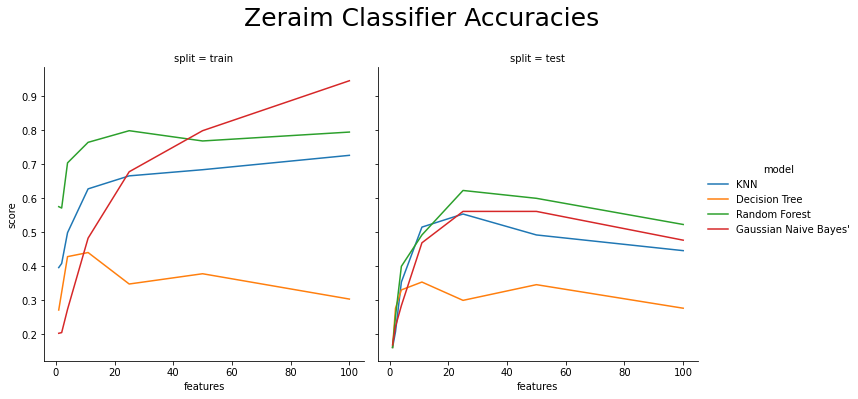

In [111]:
g = sns.FacetGrid(scores_df[scores_df.score_type=='accuracy'], col="split", col_order=["train", "test"],hue='model',
                 height = 5)
g = g.map(sns.lineplot, "features","score").add_legend()
g.fig.suptitle('Zeraim Classifier Accuracies', y = 1.1,fontsize=25)

In [112]:
scores_df[(scores_df.score_type=='accuracy')&(scores_df.split=='test')].sort_values(by='score',ascending=False).head()

,model,score_type,score,split,features
111,Random Forest,accuracy,0.623077,test,25
135,Random Forest,accuracy,0.600000,test,50
141,Gaussian Naive Bayes',accuracy,0.561538,test,50
117,Gaussian Naive Bayes',accuracy,0.561538,test,25
99,KNN,accuracy,0.553846,test,25


In [113]:
scores_df[(scores_df.score_type=='accuracy')&(scores_df.split=='train')].sort_values(by='score',ascending=False).head()

,model,score_type,score,split,features
162,Gaussian Naive Bayes',accuracy,0.945674,train,100
108,Random Forest,accuracy,0.798793,train,25
138,Gaussian Naive Bayes',accuracy,0.798793,train,50
156,Random Forest,accuracy,0.794769,train,100
132,Random Forest,accuracy,0.768612,train,50
